# Lab 4: Newton’s Divided Difference, Lagrange interpolating polynomial

### Consider $f(x) = x^2 + 1 + 5 \sin(\frac{x}{2})$.

### (a)
- Do `import numpy as np`.
- Let `xx = np.linspace(-2,3,6)` and `ff = f(xx)`. 
- Use your function `newtonDivDiff` to find the coefficients of the Lagrange polynomial in the form of (3.10) in the textbook.
- Write down the Lagrange interpolating polynomial as (3.5) in the textbook.

### (b)
- With `xx = np.linspace(-2,3,6)` and `ff = f(xx)`, find the approximated function values for `xp = np.linspace(-2,3,101)` using your function `lagrangeInterpFD`.
- Then plot in the same figure:
  - The true function values `(xp, f(xp))`,
  - The approximate function values from the Lagrange interpolating polynomial `(xp, FDapprox)`, and
  - The approximate function values from the 5th Taylor polynomial expanding at $ x = 0 $ `(xp, P5(xp))`.
  
- Plot the data points with marker `‘o’` and `markersize = 7`. 
- Use different colors or line styles for each set of function values.
- Add a legend to indicate which line represents the graph of which function.
- Save your figure as `lab5ex3b.png` and paste it into your assignment.

### (c)
- Use the result from (b).
- Plot the difference between:
  - The true function values and the approximate function values from the Lagrange interpolating polynomial `(xp, abs(f(xp) - FDapprox))`, and
  - The true function values and the approximate function values from the 5th Taylor polynomial `(xp, abs(f(xp) - P5(xp)))` in the same figure.
  
- Use different colors or line styles for each set of function value differences.
- Add a legend to indicate which line represents the graph of which function.
- Save your figure as `lab5ex3c.png` and paste it into your assignment.

### Observations:
Describe your observations from the differences plotted.


In [5]:
# part a
import numpy as np
from NumericalMethodsCode.newtonDivDiff import newtonDivDiff

f = lambda x: x**2 + 1 + 5*np.sin(x/2)
xx = np.linspace(-2, 3, 6)
ff = f(xx)

FDcoef, BDcoef = newtonDivDiff(xx, ff)

print('FDcoef = ',FDcoef)
print('BDcoef = ',BDcoef)
print('x:',xx)

FDcoef =  [ 7.92645076e-01 -1.18977277e+00  1.29345023e+00 -9.78167437e-02
 -3.81639165e-17  1.19744752e-03]
BDcoef =  [ 1.49874749e+01  5.78012001e+00  4.84946389e-01 -7.38677933e-02
  5.98723758e-03  1.19744752e-03]
x: [-2. -1.  0.  1.  2.  3.]


$P_5(x) = 0.79265 -1.1877(x+2) + 1.29345(x+2)(x+1) - 0.097817(x+2)(x+1)x -3.82 \times 10^{-17}(x+2)(x+1)x(x-1) + 0.00119744(x+2)(x+1)x(x-1)(x-2)$

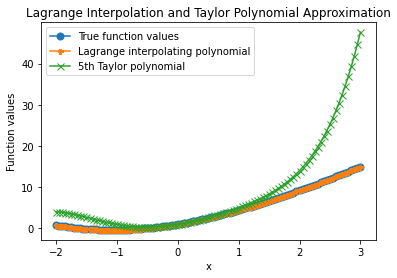

In [7]:
# part b

import numpy as np
import matplotlib.pyplot as plt
from NumericalMethodsCode.newtonDivDiff import newtonDivDiff
from NumericalMethodsCode.lagrangeInterpFD import lagrangeInterpFD

# Define the true function f and the 5th Taylor polynomial approximation
f = lambda x: x**2 + 1 + 5 * np.sin(x/2)
p5 = lambda x: 1 + 5/2*x + 2*x**2 - 5/8*x**3 + 5/32*x**5

# Create sample points for interpolation
xx = np.linspace(-2, 3, 6)
ff = f(xx)

# Points for evaluating the function and interpolation
xp = np.linspace(-2, 3, 101)

# Get the Lagrange interpolating polynomial approximation at xp
FDapprox = lagrangeInterpFD(xx, ff, xp)

# Plot the true function values, Lagrange interpolating polynomial, and 5th Taylor polynomial
plt.plot(xp, f(xp), marker='o', markersize=7, label="True function values")  # true function values
plt.plot(xp, FDapprox, marker='P', markersize=5, label="Lagrange interpolating polynomial")  # Lagrange interp
plt.plot(xp, p5(xp), marker='x', markersize=7, label="5th Taylor polynomial")  # Taylor polynomial

# Add legend and labels
plt.legend()
plt.xlabel("x")
plt.ylabel("Function values")
plt.title("Lagrange Interpolation and Taylor Polynomial Approximation")

# Show the plot
plt.show()


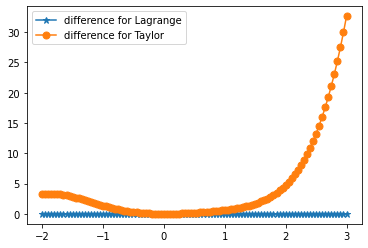

In [8]:
# part c
plt.plot(xp, abs(f(xp) -FDapprox), marker='*', markersize=7) # true values - lagrange
plt.plot(xp, abs(f(xp) - p5(xp)), marker='o', markersize=7) # true values - taylor
plt.legend(["difference for Lagrange", "difference for Taylor"])
plt.show()


The difference between the true function values and the Lagrange interpolating polynomial approximation seems to stay near zero, while the difference between the true values and the Taylor polynomial starts to dramatically increase when x is greater than 0.

### Consider the function $f(x) = \frac{1}{1 + 25x^2}$.

#### (a)
- Import `numpy` as `np`.
- Use `xx = np.linspace(-1,1,9)` to divide the interval $[-1, 1]$ into 8 equal-sized subintervals.
- Let `ff = f(xx)` and find the approximated function values for `xp = np.linspace(-1,1,101)` using your function `lagrangeInterpFD`.
- Then, plot in the same figure:
    - The true function values $(xp, f(xp))$, and
    - The approximate function values from the Lagrange interpolating polynomial $(xp, FDapprox)$.

- Plot the data points with marker `‘o’` and `markersize = 7` and use different colors or line styles for each set of function values.
- Add a legend to indicate which line represents the graph of which function.
- Save your figure as `lab5ex4a.png` and paste it into your assignment.
  
#### Notice the oscillation of the approximation. This phenomenon is called **Runge’s phenomenon**.

#### (b)
- Try the same procedure with 16 and 32 subintervals in $[-1, 1]$:
    - For 16 subintervals, use `xx = np.linspace(-1, 1, 17)`.
    - For 32 subintervals, use `xx = np.linspace(-1, 1, 33)`.

- Plot the true and approximated function values as in part (a).
- Save the figures as `lab5ex4b_16.png` and `lab5ex4b_32.png`, and paste them into your assignment.

#### Observations:
- Does the oscillation increase or decrease with more subintervals?
- Where are the oscillations most prominent?

#### Answer:
- **Oscillation Behavior**: With an increasing number of subintervals, the oscillation either decreases or becomes more contained near the endpoints. This is a characteristic behavior of Runge’s phenomenon, where interpolation oscillations are more pronounced at the edges of the interval $[-1, 1]$.
- **Most Prominent Oscillations**: The oscillations are most prominent near the boundaries of the interval, especially close to $x = -1$ and $x = 1$. As the number of points increases, these oscillations decrease, but they are still more prominent at the edges of the interpolation range.


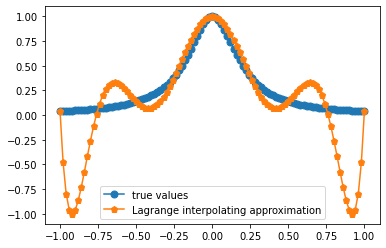

In [10]:
# part a

f = lambda x: 1 / (1 + 25*x**2)

import numpy as np
xx = np.linspace(-1, 1, 9) # divide [-1, 1] into 8 equal size subintervals
ff = f(xx)
xp = np.linspace(-1, 1, 101)
FDapprox = lagrangeInterpFD(xx, ff, xp)

plt.plot(xp, f(xp), marker='o', markersize=7) # true values
plt.plot(xp, FDapprox, marker='p', markersize=7) # approx
plt.legend(["true values", "Lagrange interpolating approximation"])
plt.show()


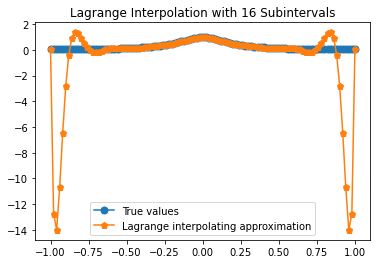

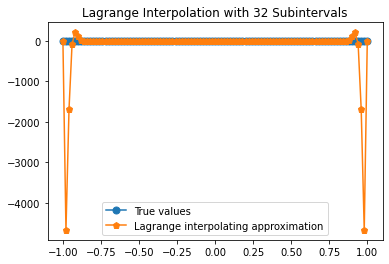

In [13]:
# Part b - 16 subintervals
f = lambda x: 1 / (1 + 25*x**2)
xx = np.linspace(-1, 1, 17)  # 16 subintervals
ff = f(xx)
xp = np.linspace(-1, 1, 101)
FDapprox = lagrangeInterpFD(xx, ff, xp)

# Plot for 16 subintervals
plt.plot(xp, f(xp), marker='o', markersize=7)  # true values
plt.plot(xp, FDapprox, marker='p', markersize=7)  # approx values
plt.legend(["True values", "Lagrange interpolating approximation"])
plt.title("Lagrange Interpolation with 16 Subintervals")  # Adding title
plt.show()

# Part b - 32 subintervals
f = lambda x: 1 / (1 + 25*x**2)
xx = np.linspace(-1, 1, 33)  # 32 subintervals
ff = f(xx)
xp = np.linspace(-1, 1, 101)
FDapprox = lagrangeInterpFD(xx, ff, xp)

# Plot for 32 subintervals
plt.plot(xp, f(xp), marker='o', markersize=7)  # true values
plt.plot(xp, FDapprox, marker='p', markersize=7)  # approx values
plt.legend(["True values", "Lagrange interpolating approximation"])
plt.title("Lagrange Interpolation with 32 Subintervals")  # Adding title
plt.show()


The oscillation increases with the number of subintervals. The oscillations are most prominent near the end of the interval.